(2400,) (2400,) (2400,)


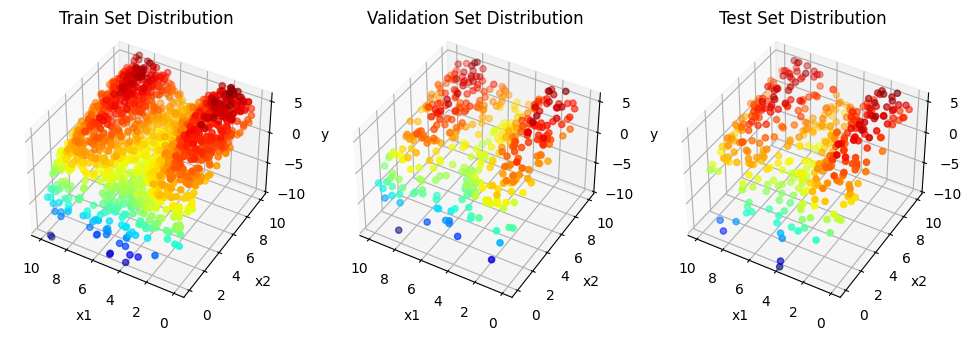

In [1]:
#x,y 데이터 3D 공간에 시각화
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

# ====== Generating Dataset ====== #
num_data = 2400
x1 = np.random.rand(num_data) * 10
x2 = np.random.rand(num_data) * 10
e = np.random.normal(0, 0.5, num_data)
X = np.array([x1, x2]).T
y = 2*np.sin(x1) + np.log(0.5*x2**2) + e
# ====== Split Dataset into Train, Validation, Test ======#
train_X, train_y = X[:1600, :], y[:1600]
val_X, val_y = X[1600:2000, :], y[1600:2000]
test_X, test_y = X[2000:, :], y[2000:]

# ====== Visualize Each Dataset ====== #
fig = plt.figure(figsize=(12,5))
ax1 = fig.add_subplot(1, 3, 1, projection='3d') #row가 1개이고 column이 3개인 그래프를 1번째 칸에데가 넣겠다.
ax1.scatter(train_X[:, 0], train_X[:, 1], train_y, c=train_y, cmap='jet')#c value에 따라 색깔을 다르게하겠다. cmap은 컬러바 종류

ax1.set_xlabel('x1')
ax1.set_ylabel('x2')
ax1.set_zlabel('y')
ax1.set_title('Train Set Distribution')
ax1.set_zlim(-10, 6) #z축의 범위
ax1.view_init(40, -60) #3d이기때문에 쓰는 옵션 보는 각도를 바꿔줌
ax1.invert_xaxis() # 오른쪽 모서리를 0 0 으로 하기 위해서

ax2 = fig.add_subplot(1, 3, 2, projection='3d')
ax2.scatter(val_X[:, 0], val_X[:, 1], val_y, c=val_y, cmap='jet')

ax2.set_xlabel('x1')
ax2.set_ylabel('x2')
ax2.set_zlabel('y')
ax2.set_title('Validation Set Distribution')
ax2.set_zlim(-10, 6)
ax2.view_init(40, -60)
ax2.invert_xaxis()

ax3 = fig.add_subplot(1, 3, 3, projection='3d')
ax3.scatter(test_X[:, 0], test_X[:, 1], test_y, c=test_y, cmap='jet')

ax3.set_xlabel('x1')
ax3.set_ylabel('x2')
ax3.set_zlabel('y')
ax3.set_title('Test Set Distribution')
ax3.set_zlim(-10, 6)
ax3.view_init(40, -60)
ax3.invert_xaxis()

print(x1.shape, x2.shape, y.shape)
plt.show()

In [2]:
import torch
print(torch.__version__)

2.0.1+cpu


Linear Regression시에 활용하는 H(x) = Wx + b 를 파이토치로 구현할 때 단순하게 nn.Linear 모듈을 하나 만들어주면 됩니다.

In [4]:
import torch
import torch.nn as nn #torch.nn.Module 은 PyTorch의 모든 Neural Network의 Base Class이다. 모듈은 다른 모듈을 포함할 수 있고, 트리 구조로 형성할 수 있다.


class LinearModel(nn.Module): #nn.moudle training 단계
    def __init__(self): 
        super(LinearModel, self).__init__()
        self.linear = nn.Linear(in_features=2, out_features=1, bias=True)
    
    def forward(self, x): #꼭지켜서 써줘야함 다른함수면 pytorch가 인식못함
    # 인스턴스(샘플) x가 인풋으로 들어왔을 때 모델이 예측하는 y값을 리턴합니다.
        return self.linear(x)
    
    
class MLPModel(nn.Module):
    def __init__(self): 
        super(MLPModel, self).__init__()
        self.linear1 = nn.Linear(in_features=2, out_features=200)
        self.linear2 = nn.Linear(in_features=200, out_features=1)
        self.relu = nn.ReLU()
    
    def forward(self, x):
    # 인스턴스(샘플) x가 인풋으로 들어왔을 때 모델이 예측하는 y값을 리턴합니다.
        x = self.linear1(x)
        x = self.relu(x)
        x = self.linear2(x)
        return x

In [6]:
lm = LinearModel()
print(lm.linear.weight) #w 행렬
print(lm.linear.bias) #bias 행렬 -> 넣은 값이 없지만 위 nn.Module 알아서 값을 넣어줌

Parameter containing:
tensor([[-0.4099, -0.6944]], requires_grad=True)
Parameter containing:
tensor([0.4888], requires_grad=True)


Regression Problem 에서의 Loss Function을 작성해봅시다.  
파이토치의 `nn` 아래에는 다양한 Loss Function이 이미 구현되어 있습니다.  
[여기](https://pytorch.org/docs/stable/_modules/torch/nn/modules/loss.html)에서 파이토치 내부에 구현되어 있는 MSE, Cross-Entropy, KL-Divergence 등을 확인할 수 있습니다.  
이 실습에서는 Regression Problem 이므로 Mean Squared Error 즉 MSE Loss를 써봅시다.

In [7]:
reg_loss = nn.MSELoss()

#uncomment for testing Loss Function 
#어떻게 loss 값을 주는지 파악할 때 아래 test실행
print(type([0,0,0,0]))
test_pred_y = torch.Tensor([0,0,0,0]) #torch의 datetype, tensor는 gradient를 지원
print(type(test_pred_y))
test_true_y = torch.Tensor([0,1,0,1])

print(reg_loss(test_pred_y, test_true_y)) #일치하지 않기 때문에 loss가 2개가 1씩 차이 나서 총 2 -> 2/4 = 0.5
print(reg_loss(test_true_y, test_true_y)) #완전 일치하기 때문에 loss가 0



<class 'list'>
<class 'torch.Tensor'>
tensor(0.5000)
tensor(0.)


이제 모델도 정의했고 Loss Function도 정의했으니 한번 학습시켜볼까요?  
저번에는 저희가 직접 파라미터(w 하나)에 따른 loss의 편미분을 유도하고 거기서 나온 그라디언트로 w를 업데이트했는데요.  
`pytorch`에서는 loss.backward() 라는 기능을 쓰면 알아서 loss를 계산되는데 사용한 각 파라미터에 대한 loss의 편미분을 계산해줍니다.  
이후 `optimizer.step()` 함수를 사용하면 각 파라미터의 그라디언트를 바탕으로 파라미터의 값을 조금씩 업데이트 해줍니다. 

이 때 모델은 매 Iteration 때마다 Train Set에 의해 학습되면서 동시에 Validation Set을 넣고 Loss를 비교하게됩니다. 
그리고 저희가 평가하고 싶은 때마다 (지금은 200번) Test Set을 넣고 Visualize 하는데 필요한 Predicted y값과 Metric 값을 계산합니다. 여기서 Metric으로는 mean absolute error(MAE)를 활용해보죵  

$$MAE(Y_{true}, Y_{predict}) = \sum_{i} | \ y_{true}^{(i)} - y_{predict}^{(i)} \ | $$

801 parameters
<generator object Module.parameters at 0x00000289A3A31AC0>
torch.Size([1600, 2]) torch.Size([1600]) torch.Size([1600, 1])
torch.Size([1600, 1]) torch.Size([1600])
tensor(24.7405, grad_fn=<MseLossBackward0>)


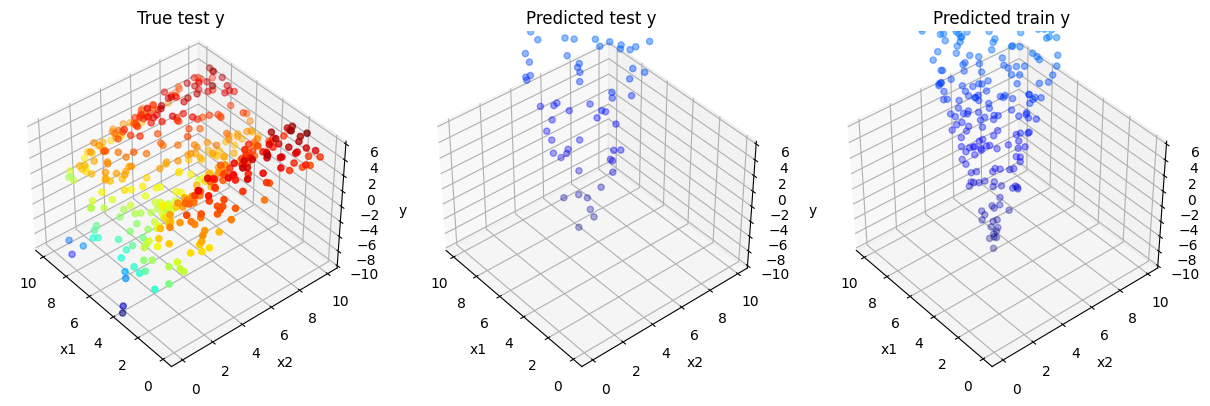

0 tensor(1950.9436, grad_fn=<MseLossBackward0>)
torch.Size([1600, 2]) torch.Size([1600]) torch.Size([1600, 1])
torch.Size([1600, 1]) torch.Size([1600])
tensor(2002.2656, grad_fn=<MseLossBackward0>)
torch.Size([1600, 2]) torch.Size([1600]) torch.Size([1600, 1])
torch.Size([1600, 1]) torch.Size([1600])
tensor(1591.2688, grad_fn=<MseLossBackward0>)
torch.Size([1600, 2]) torch.Size([1600]) torch.Size([1600, 1])
torch.Size([1600, 1]) torch.Size([1600])
tensor(11.9708, grad_fn=<MseLossBackward0>)
torch.Size([1600, 2]) torch.Size([1600]) torch.Size([1600, 1])
torch.Size([1600, 1]) torch.Size([1600])
tensor(11.7357, grad_fn=<MseLossBackward0>)
torch.Size([1600, 2]) torch.Size([1600]) torch.Size([1600, 1])
torch.Size([1600, 1]) torch.Size([1600])
tensor(11.5047, grad_fn=<MseLossBackward0>)
torch.Size([1600, 2]) torch.Size([1600]) torch.Size([1600, 1])
torch.Size([1600, 1]) torch.Size([1600])
tensor(11.2770, grad_fn=<MseLossBackward0>)
torch.Size([1600, 2]) torch.Size([1600]) torch.Size([1600, 1

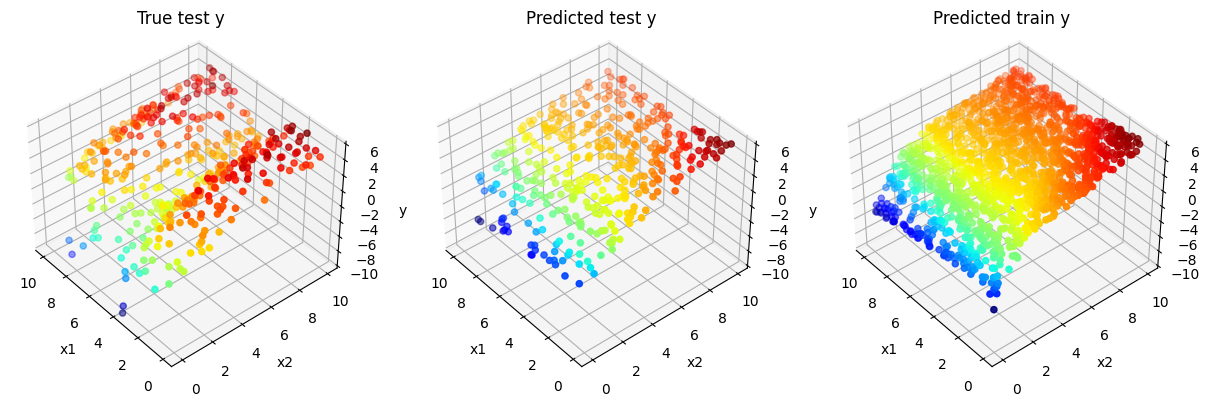

200 tensor(1.9622, grad_fn=<MseLossBackward0>)
torch.Size([1600, 2]) torch.Size([1600]) torch.Size([1600, 1])
torch.Size([1600, 1]) torch.Size([1600])
tensor(2.0511, grad_fn=<MseLossBackward0>)
torch.Size([1600, 2]) torch.Size([1600]) torch.Size([1600, 1])
torch.Size([1600, 1]) torch.Size([1600])
tensor(2.0498, grad_fn=<MseLossBackward0>)
torch.Size([1600, 2]) torch.Size([1600]) torch.Size([1600, 1])
torch.Size([1600, 1]) torch.Size([1600])
tensor(2.0486, grad_fn=<MseLossBackward0>)
torch.Size([1600, 2]) torch.Size([1600]) torch.Size([1600, 1])
torch.Size([1600, 1]) torch.Size([1600])
tensor(2.0473, grad_fn=<MseLossBackward0>)
torch.Size([1600, 2]) torch.Size([1600]) torch.Size([1600, 1])
torch.Size([1600, 1]) torch.Size([1600])
tensor(2.0461, grad_fn=<MseLossBackward0>)
torch.Size([1600, 2]) torch.Size([1600]) torch.Size([1600, 1])
torch.Size([1600, 1]) torch.Size([1600])
tensor(2.0448, grad_fn=<MseLossBackward0>)
torch.Size([1600, 2]) torch.Size([1600]) torch.Size([1600, 1])
torch.Si

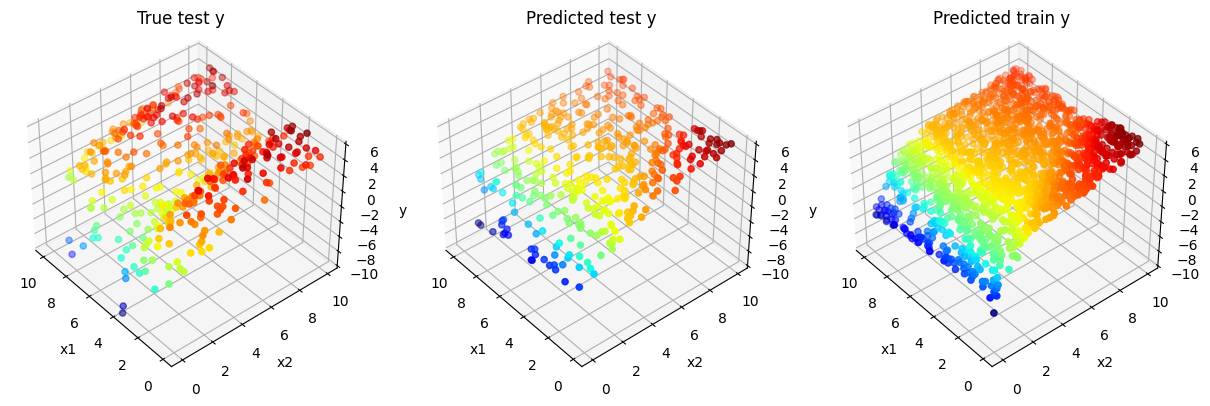

400 tensor(1.8343, grad_fn=<MseLossBackward0>)
torch.Size([1600, 2]) torch.Size([1600]) torch.Size([1600, 1])
torch.Size([1600, 1]) torch.Size([1600])
tensor(1.8734, grad_fn=<MseLossBackward0>)
torch.Size([1600, 2]) torch.Size([1600]) torch.Size([1600, 1])
torch.Size([1600, 1]) torch.Size([1600])
tensor(1.8728, grad_fn=<MseLossBackward0>)
torch.Size([1600, 2]) torch.Size([1600]) torch.Size([1600, 1])
torch.Size([1600, 1]) torch.Size([1600])
tensor(1.8721, grad_fn=<MseLossBackward0>)
torch.Size([1600, 2]) torch.Size([1600]) torch.Size([1600, 1])
torch.Size([1600, 1]) torch.Size([1600])
tensor(1.8715, grad_fn=<MseLossBackward0>)
torch.Size([1600, 2]) torch.Size([1600]) torch.Size([1600, 1])
torch.Size([1600, 1]) torch.Size([1600])
tensor(1.8708, grad_fn=<MseLossBackward0>)
torch.Size([1600, 2]) torch.Size([1600]) torch.Size([1600, 1])
torch.Size([1600, 1]) torch.Size([1600])
tensor(1.8701, grad_fn=<MseLossBackward0>)
torch.Size([1600, 2]) torch.Size([1600]) torch.Size([1600, 1])
torch.Si

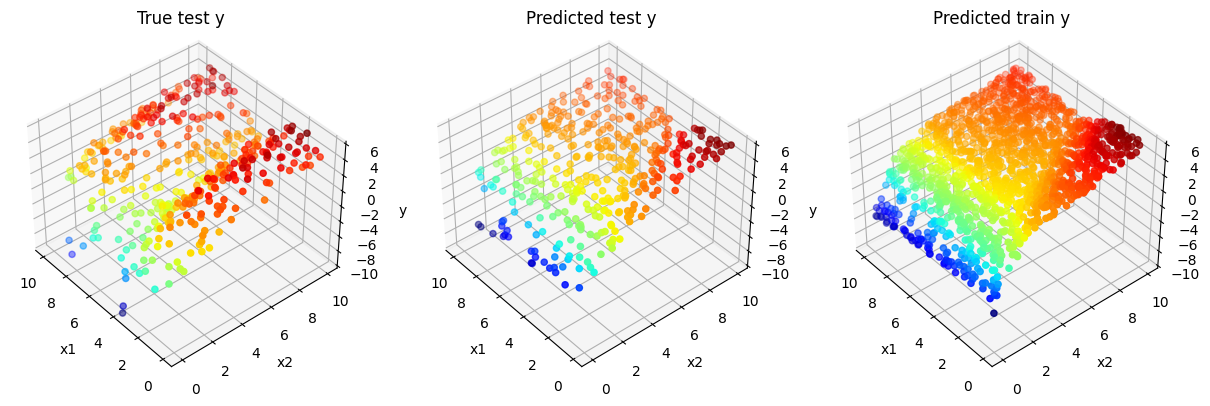

600 tensor(1.7330, grad_fn=<MseLossBackward0>)
torch.Size([1600, 2]) torch.Size([1600]) torch.Size([1600, 1])
torch.Size([1600, 1]) torch.Size([1600])
tensor(1.7515, grad_fn=<MseLossBackward0>)
torch.Size([1600, 2]) torch.Size([1600]) torch.Size([1600, 1])
torch.Size([1600, 1]) torch.Size([1600])
tensor(1.7509, grad_fn=<MseLossBackward0>)
torch.Size([1600, 2]) torch.Size([1600]) torch.Size([1600, 1])
torch.Size([1600, 1]) torch.Size([1600])
tensor(1.7504, grad_fn=<MseLossBackward0>)
torch.Size([1600, 2]) torch.Size([1600]) torch.Size([1600, 1])
torch.Size([1600, 1]) torch.Size([1600])
tensor(1.7498, grad_fn=<MseLossBackward0>)
torch.Size([1600, 2]) torch.Size([1600]) torch.Size([1600, 1])
torch.Size([1600, 1]) torch.Size([1600])
tensor(1.7492, grad_fn=<MseLossBackward0>)
torch.Size([1600, 2]) torch.Size([1600]) torch.Size([1600, 1])
torch.Size([1600, 1]) torch.Size([1600])
tensor(1.7487, grad_fn=<MseLossBackward0>)
torch.Size([1600, 2]) torch.Size([1600]) torch.Size([1600, 1])
torch.Si

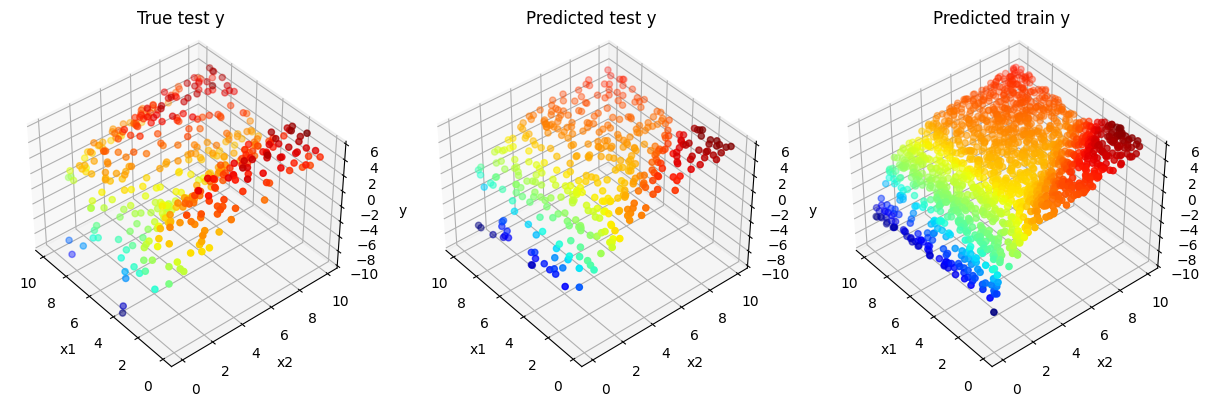

800 tensor(1.6366, grad_fn=<MseLossBackward0>)
torch.Size([1600, 2]) torch.Size([1600]) torch.Size([1600, 1])
torch.Size([1600, 1]) torch.Size([1600])
tensor(1.6519, grad_fn=<MseLossBackward0>)
torch.Size([1600, 2]) torch.Size([1600]) torch.Size([1600, 1])
torch.Size([1600, 1]) torch.Size([1600])
tensor(1.6515, grad_fn=<MseLossBackward0>)
torch.Size([1600, 2]) torch.Size([1600]) torch.Size([1600, 1])
torch.Size([1600, 1]) torch.Size([1600])
tensor(1.6511, grad_fn=<MseLossBackward0>)
torch.Size([1600, 2]) torch.Size([1600]) torch.Size([1600, 1])
torch.Size([1600, 1]) torch.Size([1600])
tensor(1.6506, grad_fn=<MseLossBackward0>)
torch.Size([1600, 2]) torch.Size([1600]) torch.Size([1600, 1])
torch.Size([1600, 1]) torch.Size([1600])
tensor(1.6502, grad_fn=<MseLossBackward0>)
torch.Size([1600, 2]) torch.Size([1600]) torch.Size([1600, 1])
torch.Size([1600, 1]) torch.Size([1600])
tensor(1.6498, grad_fn=<MseLossBackward0>)
torch.Size([1600, 2]) torch.Size([1600]) torch.Size([1600, 1])
torch.Si

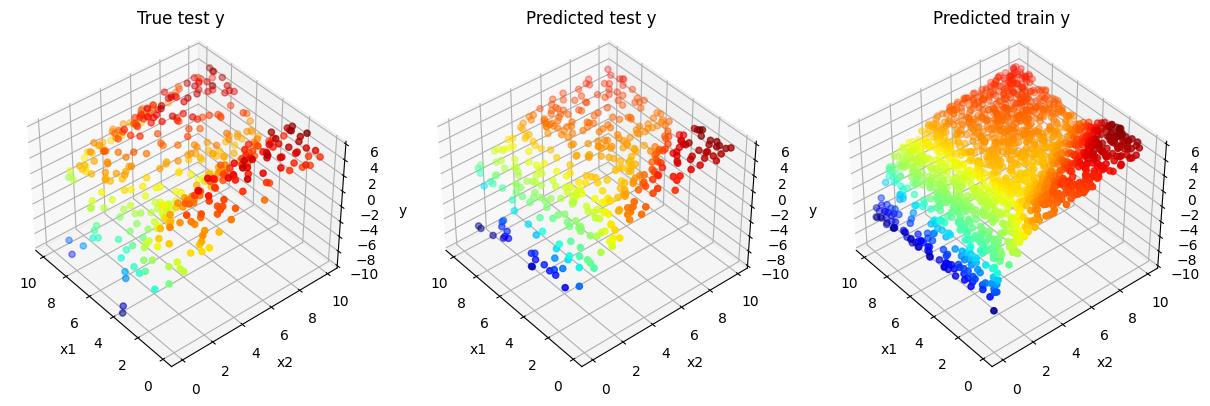

1000 tensor(1.5619, grad_fn=<MseLossBackward0>)
torch.Size([1600, 2]) torch.Size([1600]) torch.Size([1600, 1])
torch.Size([1600, 1]) torch.Size([1600])
tensor(1.5711, grad_fn=<MseLossBackward0>)
torch.Size([1600, 2]) torch.Size([1600]) torch.Size([1600, 1])
torch.Size([1600, 1]) torch.Size([1600])
tensor(1.5707, grad_fn=<MseLossBackward0>)
torch.Size([1600, 2]) torch.Size([1600]) torch.Size([1600, 1])
torch.Size([1600, 1]) torch.Size([1600])
tensor(1.5703, grad_fn=<MseLossBackward0>)
torch.Size([1600, 2]) torch.Size([1600]) torch.Size([1600, 1])
torch.Size([1600, 1]) torch.Size([1600])
tensor(1.5700, grad_fn=<MseLossBackward0>)
torch.Size([1600, 2]) torch.Size([1600]) torch.Size([1600, 1])
torch.Size([1600, 1]) torch.Size([1600])
tensor(1.5696, grad_fn=<MseLossBackward0>)
torch.Size([1600, 2]) torch.Size([1600]) torch.Size([1600, 1])
torch.Size([1600, 1]) torch.Size([1600])
tensor(1.5692, grad_fn=<MseLossBackward0>)
torch.Size([1600, 2]) torch.Size([1600]) torch.Size([1600, 1])
torch.S

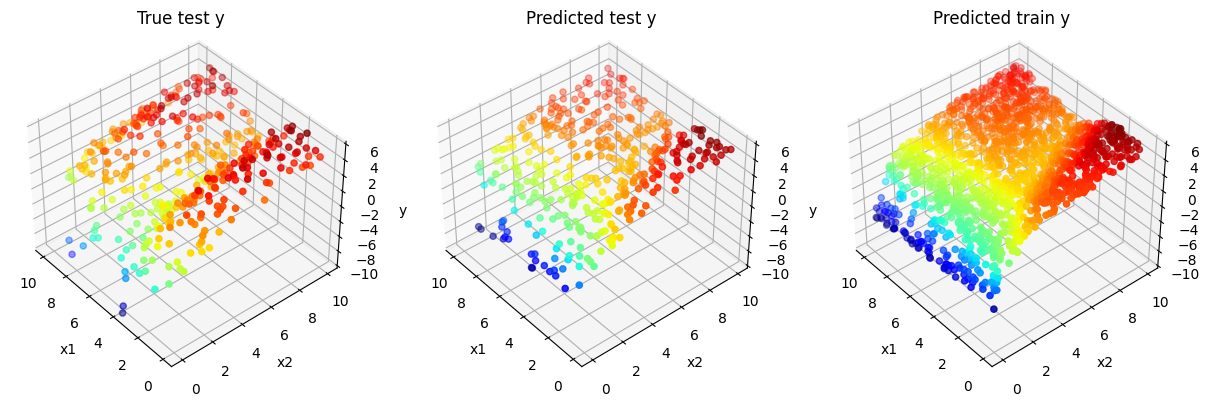

1200 tensor(1.5144, grad_fn=<MseLossBackward0>)
torch.Size([1600, 2]) torch.Size([1600]) torch.Size([1600, 1])
torch.Size([1600, 1]) torch.Size([1600])
tensor(1.4981, grad_fn=<MseLossBackward0>)
torch.Size([1600, 2]) torch.Size([1600]) torch.Size([1600, 1])
torch.Size([1600, 1]) torch.Size([1600])
tensor(1.4977, grad_fn=<MseLossBackward0>)
torch.Size([1600, 2]) torch.Size([1600]) torch.Size([1600, 1])
torch.Size([1600, 1]) torch.Size([1600])
tensor(1.4974, grad_fn=<MseLossBackward0>)
torch.Size([1600, 2]) torch.Size([1600]) torch.Size([1600, 1])
torch.Size([1600, 1]) torch.Size([1600])
tensor(1.4970, grad_fn=<MseLossBackward0>)
torch.Size([1600, 2]) torch.Size([1600]) torch.Size([1600, 1])
torch.Size([1600, 1]) torch.Size([1600])
tensor(1.4967, grad_fn=<MseLossBackward0>)
torch.Size([1600, 2]) torch.Size([1600]) torch.Size([1600, 1])
torch.Size([1600, 1]) torch.Size([1600])
tensor(1.4963, grad_fn=<MseLossBackward0>)
torch.Size([1600, 2]) torch.Size([1600]) torch.Size([1600, 1])
torch.S

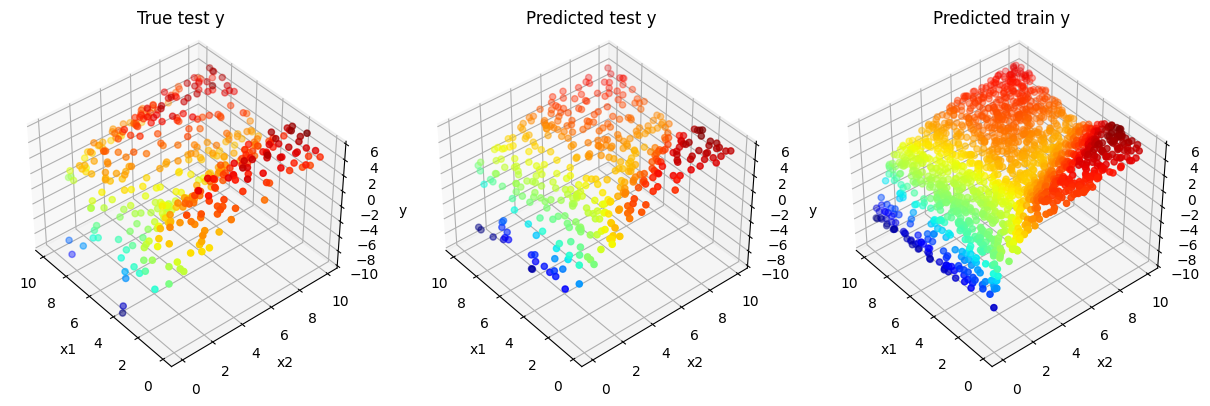

1400 tensor(1.4662, grad_fn=<MseLossBackward0>)
torch.Size([1600, 2]) torch.Size([1600]) torch.Size([1600, 1])
torch.Size([1600, 1]) torch.Size([1600])
tensor(1.4390, grad_fn=<MseLossBackward0>)
torch.Size([1600, 2]) torch.Size([1600]) torch.Size([1600, 1])
torch.Size([1600, 1]) torch.Size([1600])
tensor(1.4387, grad_fn=<MseLossBackward0>)
torch.Size([1600, 2]) torch.Size([1600]) torch.Size([1600, 1])
torch.Size([1600, 1]) torch.Size([1600])
tensor(1.4385, grad_fn=<MseLossBackward0>)
torch.Size([1600, 2]) torch.Size([1600]) torch.Size([1600, 1])
torch.Size([1600, 1]) torch.Size([1600])
tensor(1.4382, grad_fn=<MseLossBackward0>)
torch.Size([1600, 2]) torch.Size([1600]) torch.Size([1600, 1])
torch.Size([1600, 1]) torch.Size([1600])
tensor(1.4380, grad_fn=<MseLossBackward0>)
torch.Size([1600, 2]) torch.Size([1600]) torch.Size([1600, 1])
torch.Size([1600, 1]) torch.Size([1600])
tensor(1.4377, grad_fn=<MseLossBackward0>)
torch.Size([1600, 2]) torch.Size([1600]) torch.Size([1600, 1])
torch.S

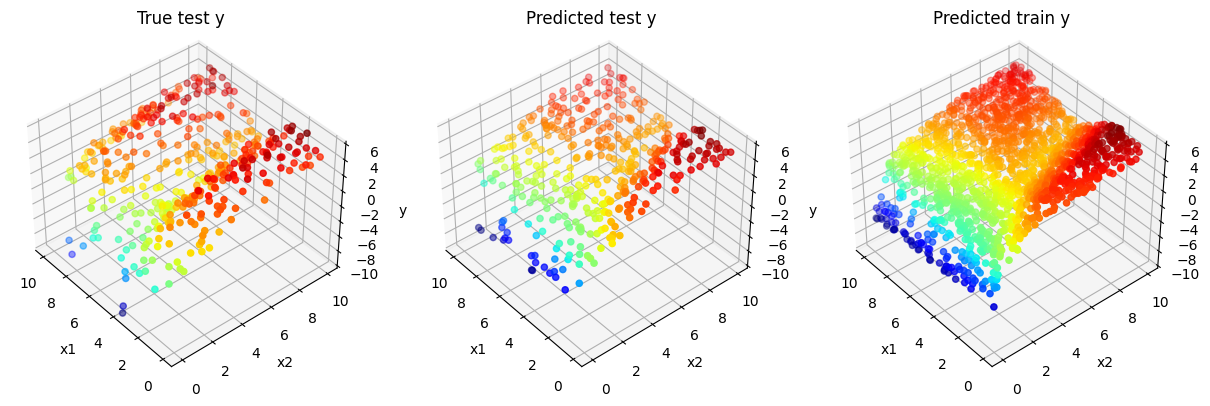

1600 tensor(1.4218, grad_fn=<MseLossBackward0>)
torch.Size([1600, 2]) torch.Size([1600]) torch.Size([1600, 1])
torch.Size([1600, 1]) torch.Size([1600])
tensor(1.3939, grad_fn=<MseLossBackward0>)
torch.Size([1600, 2]) torch.Size([1600]) torch.Size([1600, 1])
torch.Size([1600, 1]) torch.Size([1600])
tensor(1.3937, grad_fn=<MseLossBackward0>)
torch.Size([1600, 2]) torch.Size([1600]) torch.Size([1600, 1])
torch.Size([1600, 1]) torch.Size([1600])
tensor(1.3935, grad_fn=<MseLossBackward0>)
torch.Size([1600, 2]) torch.Size([1600]) torch.Size([1600, 1])
torch.Size([1600, 1]) torch.Size([1600])
tensor(1.3933, grad_fn=<MseLossBackward0>)
torch.Size([1600, 2]) torch.Size([1600]) torch.Size([1600, 1])
torch.Size([1600, 1]) torch.Size([1600])
tensor(1.3931, grad_fn=<MseLossBackward0>)
torch.Size([1600, 2]) torch.Size([1600]) torch.Size([1600, 1])
torch.Size([1600, 1]) torch.Size([1600])
tensor(1.3928, grad_fn=<MseLossBackward0>)
torch.Size([1600, 2]) torch.Size([1600]) torch.Size([1600, 1])
torch.S

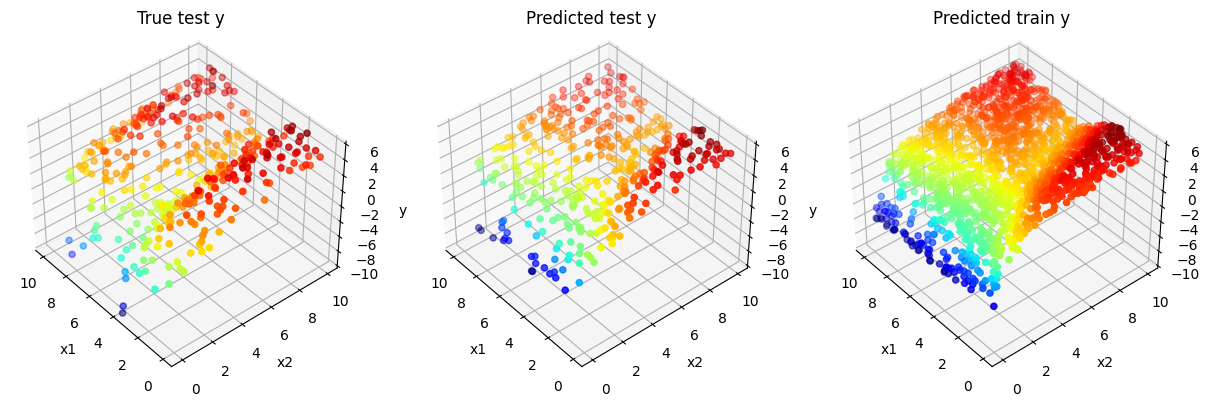

1800 tensor(1.3880, grad_fn=<MseLossBackward0>)
torch.Size([1600, 2]) torch.Size([1600]) torch.Size([1600, 1])
torch.Size([1600, 1]) torch.Size([1600])
tensor(1.3528, grad_fn=<MseLossBackward0>)
torch.Size([1600, 2]) torch.Size([1600]) torch.Size([1600, 1])
torch.Size([1600, 1]) torch.Size([1600])
tensor(1.3526, grad_fn=<MseLossBackward0>)
torch.Size([1600, 2]) torch.Size([1600]) torch.Size([1600, 1])
torch.Size([1600, 1]) torch.Size([1600])
tensor(1.3524, grad_fn=<MseLossBackward0>)
torch.Size([1600, 2]) torch.Size([1600]) torch.Size([1600, 1])
torch.Size([1600, 1]) torch.Size([1600])
tensor(1.3522, grad_fn=<MseLossBackward0>)
torch.Size([1600, 2]) torch.Size([1600]) torch.Size([1600, 1])
torch.Size([1600, 1]) torch.Size([1600])
tensor(1.3520, grad_fn=<MseLossBackward0>)
torch.Size([1600, 2]) torch.Size([1600]) torch.Size([1600, 1])
torch.Size([1600, 1]) torch.Size([1600])
tensor(1.3518, grad_fn=<MseLossBackward0>)
torch.Size([1600, 2]) torch.Size([1600]) torch.Size([1600, 1])
torch.S

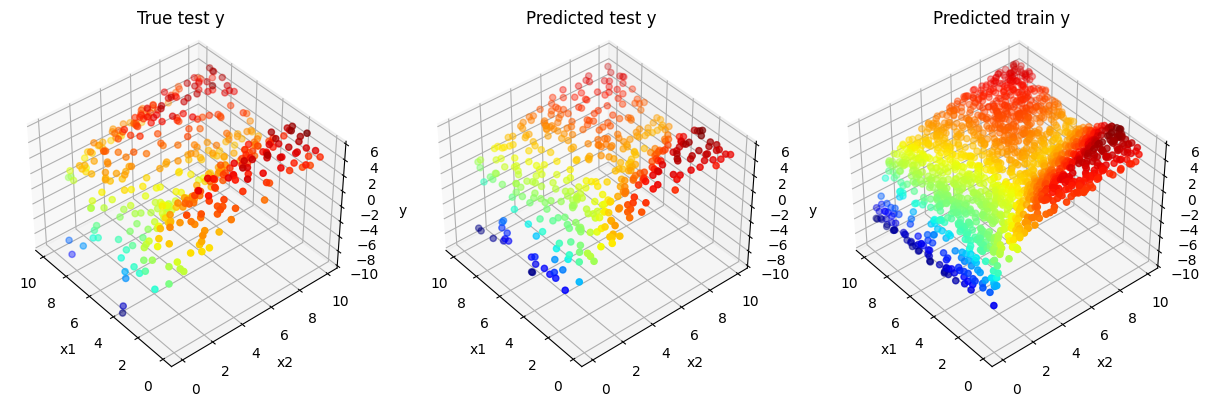

2000 tensor(1.3580, grad_fn=<MseLossBackward0>)
torch.Size([1600, 2]) torch.Size([1600]) torch.Size([1600, 1])
torch.Size([1600, 1]) torch.Size([1600])
tensor(1.3173, grad_fn=<MseLossBackward0>)
torch.Size([1600, 2]) torch.Size([1600]) torch.Size([1600, 1])
torch.Size([1600, 1]) torch.Size([1600])
tensor(1.3171, grad_fn=<MseLossBackward0>)
torch.Size([1600, 2]) torch.Size([1600]) torch.Size([1600, 1])
torch.Size([1600, 1]) torch.Size([1600])
tensor(1.3170, grad_fn=<MseLossBackward0>)
torch.Size([1600, 2]) torch.Size([1600]) torch.Size([1600, 1])
torch.Size([1600, 1]) torch.Size([1600])
tensor(1.3168, grad_fn=<MseLossBackward0>)
torch.Size([1600, 2]) torch.Size([1600]) torch.Size([1600, 1])
torch.Size([1600, 1]) torch.Size([1600])
tensor(1.3167, grad_fn=<MseLossBackward0>)
torch.Size([1600, 2]) torch.Size([1600]) torch.Size([1600, 1])
torch.Size([1600, 1]) torch.Size([1600])
tensor(1.3165, grad_fn=<MseLossBackward0>)
torch.Size([1600, 2]) torch.Size([1600]) torch.Size([1600, 1])
torch.S

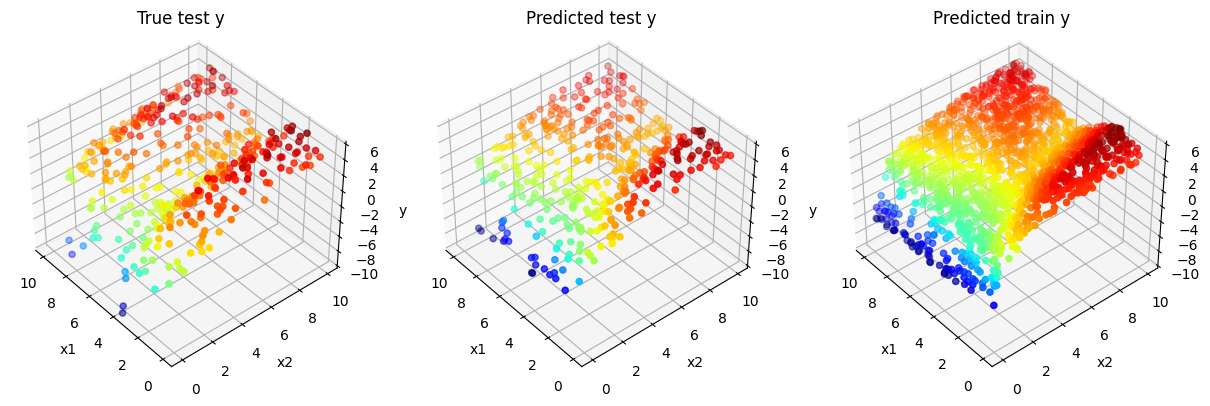

2200 tensor(1.3291, grad_fn=<MseLossBackward0>)
torch.Size([1600, 2]) torch.Size([1600]) torch.Size([1600, 1])
torch.Size([1600, 1]) torch.Size([1600])
tensor(1.2869, grad_fn=<MseLossBackward0>)
torch.Size([1600, 2]) torch.Size([1600]) torch.Size([1600, 1])
torch.Size([1600, 1]) torch.Size([1600])
tensor(1.2867, grad_fn=<MseLossBackward0>)
torch.Size([1600, 2]) torch.Size([1600]) torch.Size([1600, 1])
torch.Size([1600, 1]) torch.Size([1600])
tensor(1.2866, grad_fn=<MseLossBackward0>)
torch.Size([1600, 2]) torch.Size([1600]) torch.Size([1600, 1])
torch.Size([1600, 1]) torch.Size([1600])
tensor(1.2864, grad_fn=<MseLossBackward0>)
torch.Size([1600, 2]) torch.Size([1600]) torch.Size([1600, 1])
torch.Size([1600, 1]) torch.Size([1600])
tensor(1.2862, grad_fn=<MseLossBackward0>)
torch.Size([1600, 2]) torch.Size([1600]) torch.Size([1600, 1])
torch.Size([1600, 1]) torch.Size([1600])
tensor(1.2861, grad_fn=<MseLossBackward0>)
torch.Size([1600, 2]) torch.Size([1600]) torch.Size([1600, 1])
torch.S

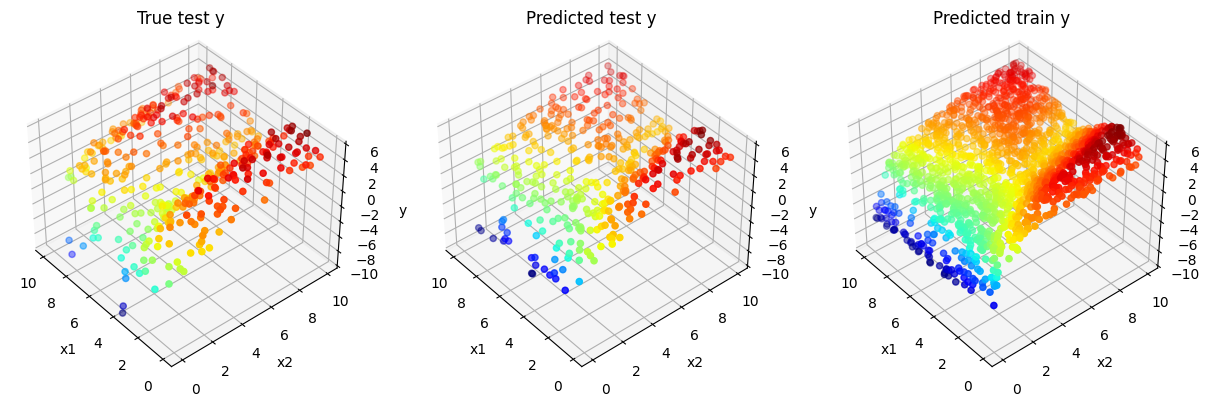

2400 tensor(1.2794, grad_fn=<MseLossBackward0>)
torch.Size([1600, 2]) torch.Size([1600]) torch.Size([1600, 1])
torch.Size([1600, 1]) torch.Size([1600])
tensor(1.2468, grad_fn=<MseLossBackward0>)
torch.Size([1600, 2]) torch.Size([1600]) torch.Size([1600, 1])
torch.Size([1600, 1]) torch.Size([1600])
tensor(1.2467, grad_fn=<MseLossBackward0>)
torch.Size([1600, 2]) torch.Size([1600]) torch.Size([1600, 1])
torch.Size([1600, 1]) torch.Size([1600])
tensor(1.2465, grad_fn=<MseLossBackward0>)
torch.Size([1600, 2]) torch.Size([1600]) torch.Size([1600, 1])
torch.Size([1600, 1]) torch.Size([1600])
tensor(1.2464, grad_fn=<MseLossBackward0>)
torch.Size([1600, 2]) torch.Size([1600]) torch.Size([1600, 1])
torch.Size([1600, 1]) torch.Size([1600])
tensor(1.2463, grad_fn=<MseLossBackward0>)
torch.Size([1600, 2]) torch.Size([1600]) torch.Size([1600, 1])
torch.Size([1600, 1]) torch.Size([1600])
tensor(1.2461, grad_fn=<MseLossBackward0>)
torch.Size([1600, 2]) torch.Size([1600]) torch.Size([1600, 1])
torch.S

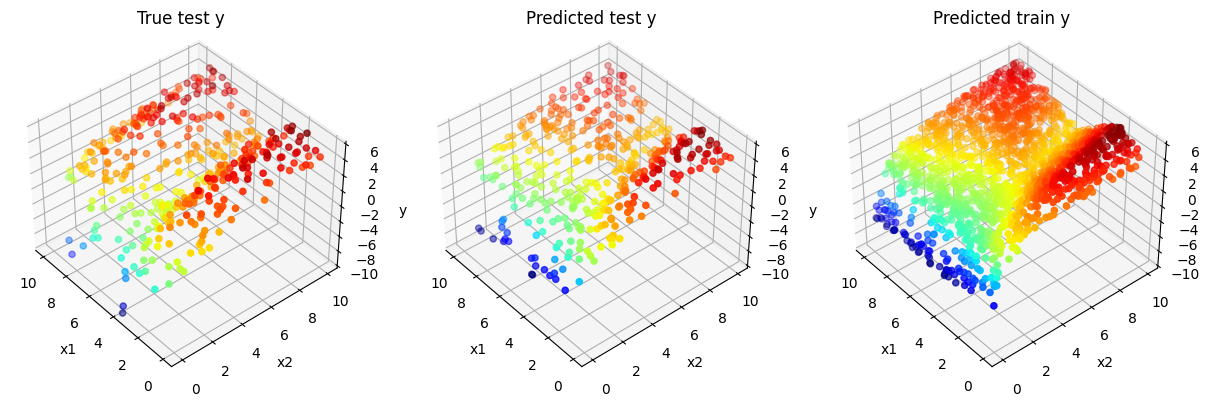

2600 tensor(1.2478, grad_fn=<MseLossBackward0>)
torch.Size([1600, 2]) torch.Size([1600]) torch.Size([1600, 1])
torch.Size([1600, 1]) torch.Size([1600])
tensor(1.2136, grad_fn=<MseLossBackward0>)
torch.Size([1600, 2]) torch.Size([1600]) torch.Size([1600, 1])
torch.Size([1600, 1]) torch.Size([1600])
tensor(1.2134, grad_fn=<MseLossBackward0>)
torch.Size([1600, 2]) torch.Size([1600]) torch.Size([1600, 1])
torch.Size([1600, 1]) torch.Size([1600])
tensor(1.2131, grad_fn=<MseLossBackward0>)
torch.Size([1600, 2]) torch.Size([1600]) torch.Size([1600, 1])
torch.Size([1600, 1]) torch.Size([1600])
tensor(1.2129, grad_fn=<MseLossBackward0>)
torch.Size([1600, 2]) torch.Size([1600]) torch.Size([1600, 1])
torch.Size([1600, 1]) torch.Size([1600])
tensor(1.2127, grad_fn=<MseLossBackward0>)
torch.Size([1600, 2]) torch.Size([1600]) torch.Size([1600, 1])
torch.Size([1600, 1]) torch.Size([1600])
tensor(1.2125, grad_fn=<MseLossBackward0>)
torch.Size([1600, 2]) torch.Size([1600]) torch.Size([1600, 1])
torch.S

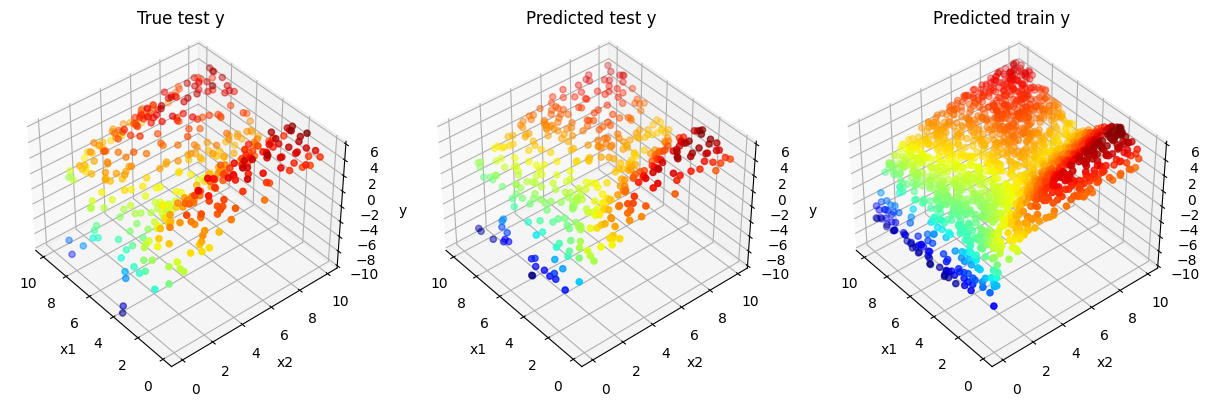

2800 tensor(1.2145, grad_fn=<MseLossBackward0>)
torch.Size([1600, 2]) torch.Size([1600]) torch.Size([1600, 1])
torch.Size([1600, 1]) torch.Size([1600])
tensor(1.1856, grad_fn=<MseLossBackward0>)
torch.Size([1600, 2]) torch.Size([1600]) torch.Size([1600, 1])
torch.Size([1600, 1]) torch.Size([1600])
tensor(1.1855, grad_fn=<MseLossBackward0>)
torch.Size([1600, 2]) torch.Size([1600]) torch.Size([1600, 1])
torch.Size([1600, 1]) torch.Size([1600])
tensor(1.1854, grad_fn=<MseLossBackward0>)
torch.Size([1600, 2]) torch.Size([1600]) torch.Size([1600, 1])
torch.Size([1600, 1]) torch.Size([1600])
tensor(1.1853, grad_fn=<MseLossBackward0>)
torch.Size([1600, 2]) torch.Size([1600]) torch.Size([1600, 1])
torch.Size([1600, 1]) torch.Size([1600])
tensor(1.1851, grad_fn=<MseLossBackward0>)
torch.Size([1600, 2]) torch.Size([1600]) torch.Size([1600, 1])
torch.Size([1600, 1]) torch.Size([1600])
tensor(1.1850, grad_fn=<MseLossBackward0>)
torch.Size([1600, 2]) torch.Size([1600]) torch.Size([1600, 1])
torch.S

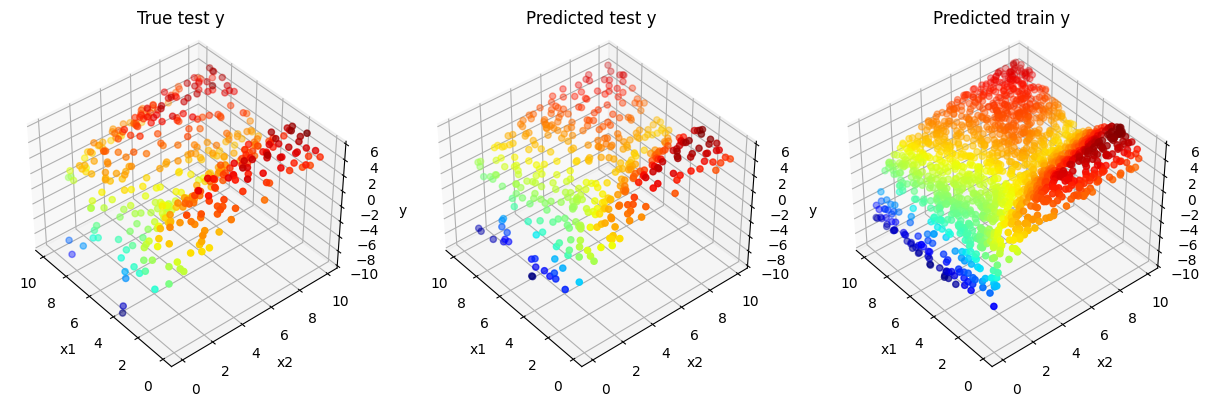

3000 tensor(1.1766, grad_fn=<MseLossBackward0>)
torch.Size([1600, 2]) torch.Size([1600]) torch.Size([1600, 1])
torch.Size([1600, 1]) torch.Size([1600])
tensor(1.1612, grad_fn=<MseLossBackward0>)
torch.Size([1600, 2]) torch.Size([1600]) torch.Size([1600, 1])
torch.Size([1600, 1]) torch.Size([1600])
tensor(1.1607, grad_fn=<MseLossBackward0>)
torch.Size([1600, 2]) torch.Size([1600]) torch.Size([1600, 1])
torch.Size([1600, 1]) torch.Size([1600])
tensor(1.1609, grad_fn=<MseLossBackward0>)
torch.Size([1600, 2]) torch.Size([1600]) torch.Size([1600, 1])
torch.Size([1600, 1]) torch.Size([1600])
tensor(1.1606, grad_fn=<MseLossBackward0>)
torch.Size([1600, 2]) torch.Size([1600]) torch.Size([1600, 1])
torch.Size([1600, 1]) torch.Size([1600])
tensor(1.1609, grad_fn=<MseLossBackward0>)
torch.Size([1600, 2]) torch.Size([1600]) torch.Size([1600, 1])
torch.Size([1600, 1]) torch.Size([1600])
tensor(1.1603, grad_fn=<MseLossBackward0>)
torch.Size([1600, 2]) torch.Size([1600]) torch.Size([1600, 1])
torch.S

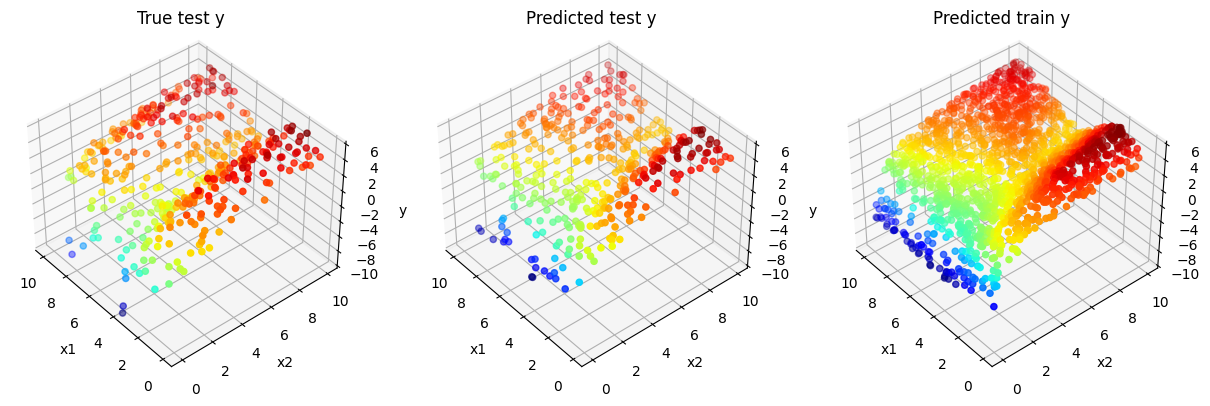

3200 tensor(1.1463, grad_fn=<MseLossBackward0>)
torch.Size([1600, 2]) torch.Size([1600]) torch.Size([1600, 1])
torch.Size([1600, 1]) torch.Size([1600])
tensor(1.1426, grad_fn=<MseLossBackward0>)
torch.Size([1600, 2]) torch.Size([1600]) torch.Size([1600, 1])
torch.Size([1600, 1]) torch.Size([1600])
tensor(1.1413, grad_fn=<MseLossBackward0>)
torch.Size([1600, 2]) torch.Size([1600]) torch.Size([1600, 1])
torch.Size([1600, 1]) torch.Size([1600])
tensor(1.1421, grad_fn=<MseLossBackward0>)
torch.Size([1600, 2]) torch.Size([1600]) torch.Size([1600, 1])
torch.Size([1600, 1]) torch.Size([1600])
tensor(1.1413, grad_fn=<MseLossBackward0>)
torch.Size([1600, 2]) torch.Size([1600]) torch.Size([1600, 1])
torch.Size([1600, 1]) torch.Size([1600])
tensor(1.1422, grad_fn=<MseLossBackward0>)
torch.Size([1600, 2]) torch.Size([1600]) torch.Size([1600, 1])
torch.Size([1600, 1]) torch.Size([1600])
tensor(1.1409, grad_fn=<MseLossBackward0>)
torch.Size([1600, 2]) torch.Size([1600]) torch.Size([1600, 1])
torch.S

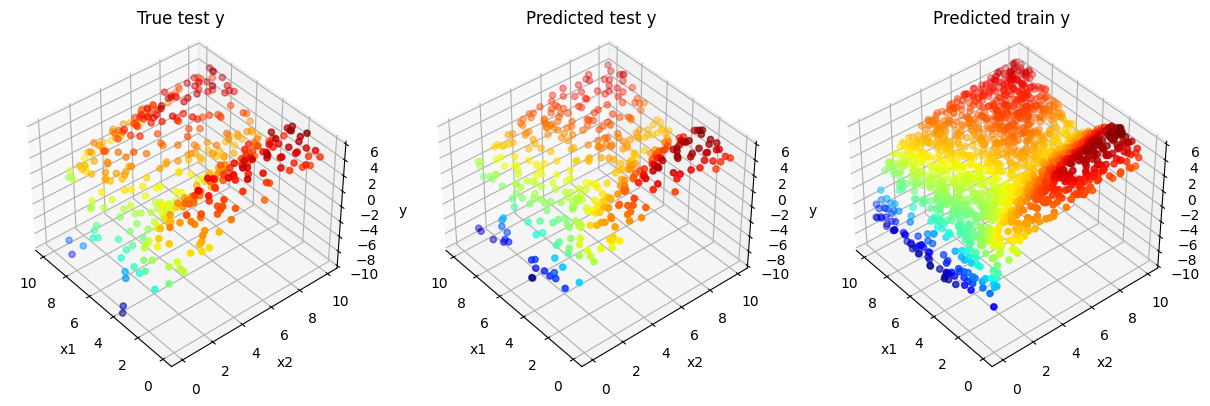

3400 tensor(1.1218, grad_fn=<MseLossBackward0>)
torch.Size([1600, 2]) torch.Size([1600]) torch.Size([1600, 1])
torch.Size([1600, 1]) torch.Size([1600])
tensor(1.1217, grad_fn=<MseLossBackward0>)
torch.Size([1600, 2]) torch.Size([1600]) torch.Size([1600, 1])
torch.Size([1600, 1]) torch.Size([1600])
tensor(1.1202, grad_fn=<MseLossBackward0>)
torch.Size([1600, 2]) torch.Size([1600]) torch.Size([1600, 1])
torch.Size([1600, 1]) torch.Size([1600])
tensor(1.1212, grad_fn=<MseLossBackward0>)
torch.Size([1600, 2]) torch.Size([1600]) torch.Size([1600, 1])
torch.Size([1600, 1]) torch.Size([1600])
tensor(1.1198, grad_fn=<MseLossBackward0>)
torch.Size([1600, 2]) torch.Size([1600]) torch.Size([1600, 1])
torch.Size([1600, 1]) torch.Size([1600])
tensor(1.1209, grad_fn=<MseLossBackward0>)
torch.Size([1600, 2]) torch.Size([1600]) torch.Size([1600, 1])
torch.Size([1600, 1]) torch.Size([1600])
tensor(1.1195, grad_fn=<MseLossBackward0>)
torch.Size([1600, 2]) torch.Size([1600]) torch.Size([1600, 1])
torch.S

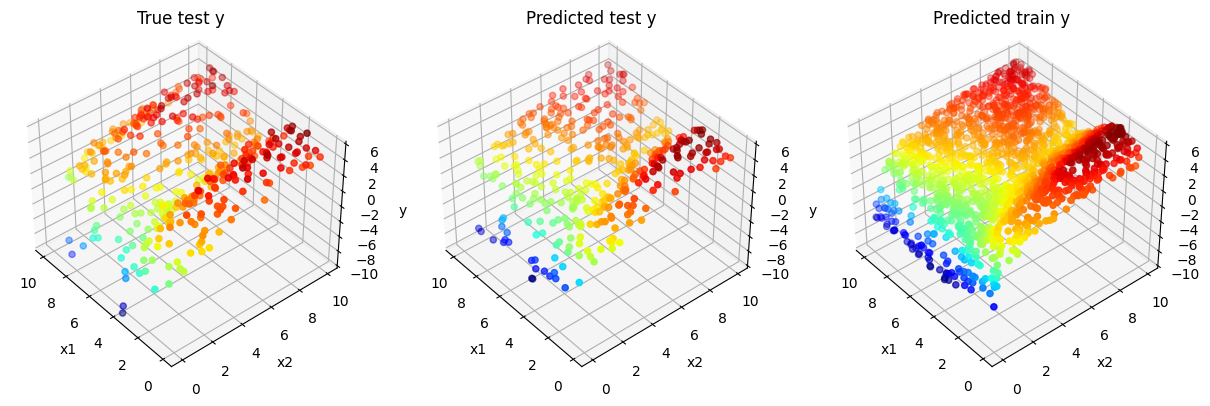

3600 tensor(1.1022, grad_fn=<MseLossBackward0>)
torch.Size([1600, 2]) torch.Size([1600]) torch.Size([1600, 1])
torch.Size([1600, 1]) torch.Size([1600])
tensor(1.1022, grad_fn=<MseLossBackward0>)
torch.Size([1600, 2]) torch.Size([1600]) torch.Size([1600, 1])
torch.Size([1600, 1]) torch.Size([1600])
tensor(1.1015, grad_fn=<MseLossBackward0>)
torch.Size([1600, 2]) torch.Size([1600]) torch.Size([1600, 1])
torch.Size([1600, 1]) torch.Size([1600])
tensor(1.1017, grad_fn=<MseLossBackward0>)
torch.Size([1600, 2]) torch.Size([1600]) torch.Size([1600, 1])
torch.Size([1600, 1]) torch.Size([1600])
tensor(1.1009, grad_fn=<MseLossBackward0>)
torch.Size([1600, 2]) torch.Size([1600]) torch.Size([1600, 1])
torch.Size([1600, 1]) torch.Size([1600])
tensor(1.1011, grad_fn=<MseLossBackward0>)
torch.Size([1600, 2]) torch.Size([1600]) torch.Size([1600, 1])
torch.Size([1600, 1]) torch.Size([1600])
tensor(1.1003, grad_fn=<MseLossBackward0>)
torch.Size([1600, 2]) torch.Size([1600]) torch.Size([1600, 1])
torch.S

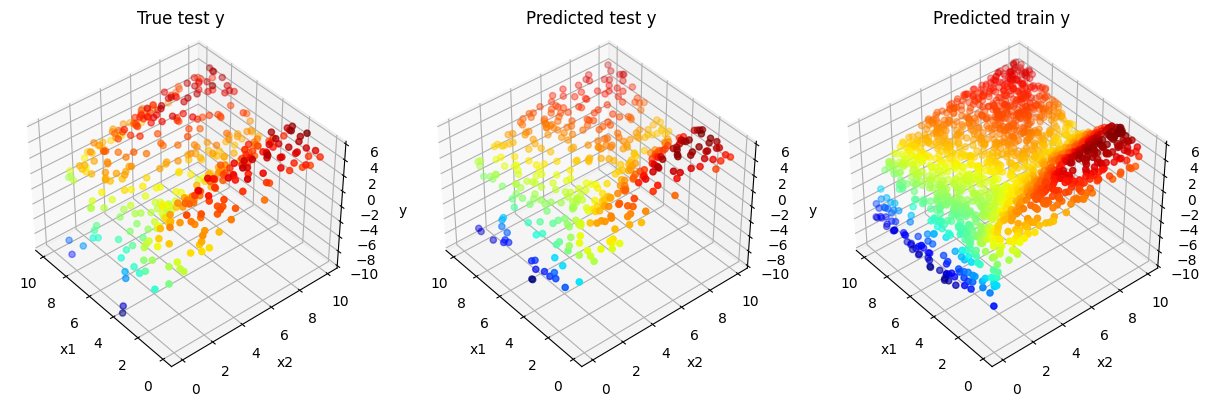

3800 tensor(1.0838, grad_fn=<MseLossBackward0>)
torch.Size([1600, 2]) torch.Size([1600]) torch.Size([1600, 1])
torch.Size([1600, 1]) torch.Size([1600])
tensor(1.0793, grad_fn=<MseLossBackward0>)
torch.Size([1600, 2]) torch.Size([1600]) torch.Size([1600, 1])
torch.Size([1600, 1]) torch.Size([1600])
tensor(1.0783, grad_fn=<MseLossBackward0>)
torch.Size([1600, 2]) torch.Size([1600]) torch.Size([1600, 1])
torch.Size([1600, 1]) torch.Size([1600])
tensor(1.0798, grad_fn=<MseLossBackward0>)
torch.Size([1600, 2]) torch.Size([1600]) torch.Size([1600, 1])
torch.Size([1600, 1]) torch.Size([1600])
tensor(1.0780, grad_fn=<MseLossBackward0>)
torch.Size([1600, 2]) torch.Size([1600]) torch.Size([1600, 1])
torch.Size([1600, 1]) torch.Size([1600])
tensor(1.0794, grad_fn=<MseLossBackward0>)
torch.Size([1600, 2]) torch.Size([1600]) torch.Size([1600, 1])
torch.Size([1600, 1]) torch.Size([1600])
tensor(1.0777, grad_fn=<MseLossBackward0>)
torch.Size([1600, 2]) torch.Size([1600]) torch.Size([1600, 1])
torch.S

In [10]:
import torch.optim as optim
from sklearn.metrics import mean_absolute_error


# ====== Construct Model ====== #
# model = LinearModel()
# print(model.linear.weight)
# print(model.linear.bias)

model = MLPModel() # Model을 생성해줍니다.
print('{} parameters'.format(sum(p.numel() for p in model.parameters() if p.requires_grad))) # 복잡해보이지만 간단히 모델 내에 학습을 당할 파라미터 수를 카운팅하는 코드입니다.

# ===== Construct Optimizer ====== #
lr = 0.005 # Learning Rate를 하나 정해줍니다. (원할한 학습을 위해 손을 많이 탑니다)
optimizer = optim.SGD(model.parameters(), lr=lr) # Optimizer를 생성해줍니다.model.parameters()로 w와 b를 optimizer에게 전달 

print(model.parameters())
#SGD : Stochastic Gradient Descent
#adam , rmsprop , adadelta etc

# 매 학습 단계에서의 epoch값과 그 때의 loss 값을 저장할 리스트를 만들어줍시다.
list_epoch = [] 
list_train_loss = []
list_val_loss = []
list_mae = []
list_mae_epoch = []


epoch = 4000 # 학습 횟수(epoch)을 지정해줍시다. 
#iteration과 혼동 X iteration : parameter가 한번 업데이트 되는 것을 말함
#만약 data가 10만개 만개 씩 chunk 하면(chunk를 batch 혹은 mini batch 라고함) batch 한번으로 gradient를 업데이트하는데 이때 1 iteration 한 것 이때 각 batch를 모두 수행하면 즉 10 iteration을 하면 이게 1 epoch

for i in range(epoch):
    
    # ====== Train ====== #
    model.train() # model을 train 모드로 세팅합니다. 반대로 향후 모델을 평가할 때는 eval() 모드로 변경할 겁니다 (나중 실습에서 쓸 겁니다)
    optimizer.zero_grad() # optimizer에 남아있을 수도 있는 잔여 그라디언트를 0으로 다 초기화해줍니다. 반복문 상 한번 train할 때 남은 gradient가 중첩하는 것을 방지
    
    #train_X 와 train_Y는 각각 numpy로 이를 tensor로 바꿔줌
    input_x = torch.Tensor(train_X)
    true_y = torch.Tensor(train_y)
    pred_y = model(input_x)
    print(input_x.shape, true_y.shape, pred_y.shape) # 각 인풋과 아웃풋의 차원을 체크해봅니다.
    

    print(pred_y.shape,pred_y.squeeze().shape)
    loss = reg_loss(pred_y.squeeze(), true_y) #pred_y의 shape은 1600 X 1 즉 2차원으로 되어있음 loss는 1600을 원하기 때문에 2차원을 1차원리스트로 바꿈
    print(loss)

    loss.backward() # backward()를 통해서 그라디언트를 구해줍니다.
    optimizer.step() # step()을 통해서 그라디언트를 바탕으로 파라미터를 업데이트 해줍니다. 
    list_epoch.append(i)
    #list_train_loss.append(loss.detach().numpy()) #위에 loss에 backward를 해줬기 때문에 gradient가 loss에 존재하기때문에 gradient를 제외하고 loss만 출력하고자 detach() 사용 , 해당 type이 tensor 이기 때문에 numpy() 로 바꿈
    list_train_loss.append(loss.item()) #loss.item하면 위 말한 과정이 한번에

    
    
    # ====== Validation ====== #
    model.eval() #evaluation 모드로 바꿔줌
    optimizer.zero_grad()
    input_x = torch.Tensor(val_X)
    true_y = torch.Tensor(val_y)
    pred_y = model(input_x)   
    loss = reg_loss(pred_y.squeeze(), true_y)
    list_val_loss.append(loss.detach().numpy())
    

    # ====== Evaluation ======= #
    if i % 200 == 0: # 200회의 학습마다 실제 데이터 분포와 모델이 예측한 분포를 그려봅니다.
        
        # ====== Calculate MAE ====== #
        model.eval()
        optimizer.zero_grad()
        input_x = torch.Tensor(test_X)
        true_y = torch.Tensor(test_y)
        pred_y = model(input_x).detach().numpy() 
        mae = mean_absolute_error(true_y, pred_y) # sklearn 쪽 함수들은 true_y 가 먼저, pred_y가 나중에 인자로 들어가는 것에 주의합시다
        list_mae.append(mae)
        list_mae_epoch.append(i)
        
        fig = plt.figure(figsize=(15,5))
        
        # ====== True Y Scattering ====== #
        ax1 = fig.add_subplot(1, 3, 1, projection='3d')
        ax1.scatter(test_X[:, 0], test_X[:, 1], test_y, c=test_y, cmap='jet')
        
        ax1.set_xlabel('x1')
        ax1.set_ylabel('x2')
        ax1.set_zlabel('y')
        ax1.set_zlim(-10, 6)
        ax1.view_init(40, -40)
        ax1.set_title('True test y')
        ax1.invert_xaxis()

        # ====== Predicted Y Scattering ====== #
        ax2 = fig.add_subplot(1, 3, 2, projection='3d')
        ax2.scatter(test_X[:, 0], test_X[:, 1], pred_y, c=pred_y[:,0], cmap='jet')

        ax2.set_xlabel('x1')
        ax2.set_ylabel('x2')
        ax2.set_zlabel('y')
        ax2.set_zlim(-10, 6)
        ax2.view_init(40, -40)
        ax2.set_title('Predicted test y')
        ax2.invert_xaxis()

        # ====== Just for Visualizaing with High Resolution ====== #
        input_x = torch.Tensor(train_X)
        pred_y = model(input_x).detach().numpy() 
        
        ax3 = fig.add_subplot(1, 3, 3, projection='3d')
        ax3.scatter(train_X[:, 0], train_X[:, 1], pred_y, c=pred_y[:,0], cmap='jet')

        ax3.set_xlabel('x1')
        ax3.set_ylabel('x2')
        ax3.set_zlabel('y')
        ax3.set_zlim(-10, 6)
        ax3.view_init(40, -40)
        ax3.set_title('Predicted train y')
        ax3.invert_xaxis()
        
        plt.show()
        print(i, loss)

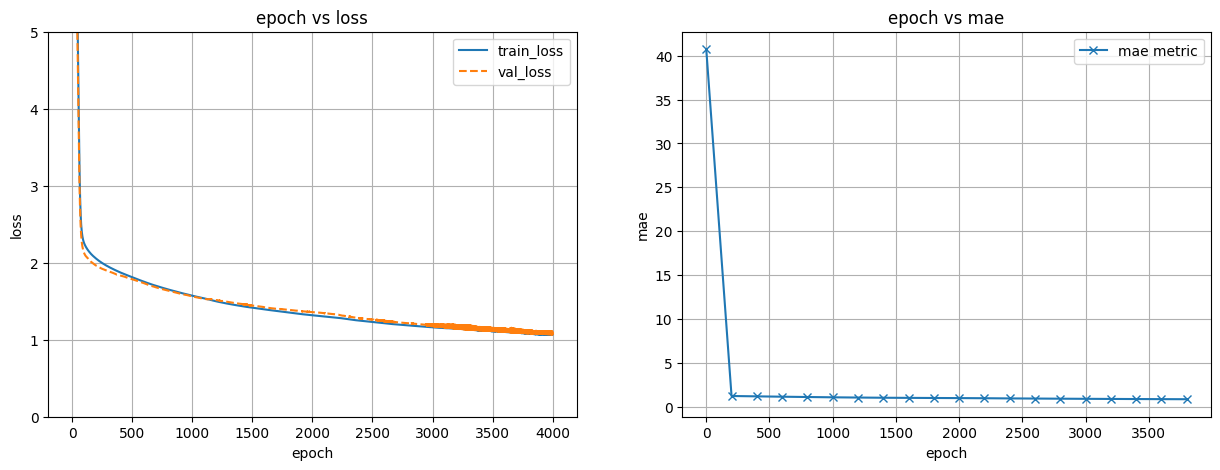

In [11]:
#loss를 저장해서 해당 과정이 어떻게 진행했는지 확인하는 절차 꼭해줘야함!!!


fig = plt.figure(figsize=(15,5))

# ====== Loss Fluctuation ====== #
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(list_epoch, list_train_loss, label='train_loss')
ax1.plot(list_epoch, list_val_loss, '--', label='val_loss')
ax1.set_xlabel('epoch')
ax1.set_ylabel('loss')
ax1.set_ylim(0, 5)
ax1.grid()
ax1.legend()
ax1.set_title('epoch vs loss')

# ====== Metric Fluctuation ====== #
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(list_mae_epoch, list_mae, marker='x', label='mae metric')

ax2.set_xlabel('epoch')
ax2.set_ylabel('mae')
ax2.grid()
ax2.legend()
ax2.set_title('epoch vs mae')


plt.show()